In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

In [72]:
def show_result(change_rate_map, nuclei_true, frame_num):
    dsiplay = change_rate_map

    lim_min = np.max(np.abs(dsiplay[:,:,frame_num]))*-1
    lim_max = np.max(np.abs(dsiplay[:,:,frame_num]))

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.invert_yaxis()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)

    cm = plt.cm.seismic.copy()
    cm.set_bad((0, 0, 0, 1))

    mesh = ax.pcolormesh(np.ma.array(dsiplay[:,:,frame_num], mask=nuclei_true[:,:,frame_num]==0), cmap = cm)
    mesh.set_clim(lim_min,lim_max)

    fig.colorbar(mesh,cax=cax)

    

def show_result_custom(change_rate_map,  nuclei_true, frame_num, lim_min, lim_max):
    dsiplay = change_rate_map

    lim_min = lim_min
    lim_max = lim_max

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.invert_yaxis()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)

    cm = plt.cm.seismic.copy()
    cm.set_bad((0, 0, 0, 1))

    mesh = ax.pcolormesh(np.ma.array(dsiplay[:,:,frame_num], mask=nuclei_true[:,:,frame_num]==0), cmap = cm)
    mesh.set_clim(lim_min,lim_max)

    fig.colorbar(mesh,cax=cax)

    

def video(nucleis_true):
    fig = plt.figure()
    im = plt.imshow(nuclei_true[:,:,0], cmap=plt.get_cmap('jet'), vmin=0,)
    
    def updatefig(j):
        # set the data in the axesimage object
        im.set_array(nuclei_true[:,:,j])
        # return the artists set
        return [im]
    
    ani = animation.FuncAnimation(fig, updatefig, frames=nuclei_true.shape[2], interval=20, blit=True)
    return(ani)



def map_video(change_rate_map,nuclei_true):
    dsiplay = change_rate_map

    lim_min = np.max(np.abs(dsiplay[:,:,-1]))*-1
    lim_max = np.max(np.abs(dsiplay[:,:,-1]))

    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.invert_yaxis()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.3)

    cm = plt.cm.seismic.copy()
    cm.set_bad((0, 0, 0, 1))

    mesh = ax.pcolormesh(dsiplay[:,:,0], cmap = cm)
    mesh.set_clim(lim_min, lim_max)
    fig.colorbar(mesh,cax=cax)

    def updatefig(j):
        mesh.set_array(np.ma.array(dsiplay[:,:,j], mask=nuclei_true[:,:,j]==0))
        return [mesh]


    ani = animation.FuncAnimation(fig, updatefig, frames=result_vert_change_rate_map.shape[2], interval=20, blit=True)
    return(ani)



def map_video_custom(change_rate_map, nuclei_true, lim_min, lim_max):
    dsiplay = change_rate_map

    lim_min = lim_min
    lim_max = lim_max

    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.invert_yaxis()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.3)

    cm = plt.cm.seismic.copy()
    cm.set_bad((0, 0, 0, 1))

    mesh = ax.pcolormesh(dsiplay[:,:,0], cmap = cm)
    mesh.set_clim(lim_min, lim_max)
    fig.colorbar(mesh,cax=cax)
    
    def updatefig(j):
        mesh.set_array(np.ma.array(dsiplay[:,:,j], mask=nuclei_true[:,:,j]==0))
        return [mesh]

    
    ani = animation.FuncAnimation(fig, updatefig, frames=result_vert_change_rate_map.shape[2], interval=20, blit=True)
    return(ani)


def make_particle_change_lists(change_lists_array):
    particel_num_lists_1d_array = np.asarray([np.hsplit(change_lists_array[num],[1])[0] 
                             for num in range(len(change_lists_array))],dtype=object)
    
    change_lists_1d_array = np.asarray([np.hsplit(change_lists_array[num],[1])[1] 
                             for num in range(len(change_lists_array))],dtype=object)
    
    ## remove  nan and inf value
    change_lists_1d_array_mod = np.asarray([np.nan_to_num(change_lists_1d_array[num],nan=0.0, posinf=0.0, neginf=0.0) 
                                           for num in range(len(change_lists_1d_array))],dtype=object)
    
    particle_change_rate_lists = []
    for i in tqdm(np.unique(particel_num_lists_1d_array[0])):
        change_rate_lists = []
        for j in range(len(change_lists_1d_array)):
            change_list_1d_array = change_lists_1d_array_mod[j]
            change_rate = change_list_1d_array[np.where(particel_num_lists_1d_array[j]==i)[0]]
            if change_rate.size==0:
                continue
            else:
                change_rate_lists.extend(change_rate)
        particle_change_rate_lists.append(change_rate_lists)
    return particle_change_rate_lists



def modify_change_rate_lists(particle_change_rate_lists):
    particle_change_rate_lists_mod = []
    
    for i in tqdm(range(len(particle_change_rate_lists))):
        particle_change_rate_list = particle_change_rate_lists[i]
        if np.max(particle_change_rate_list[0:25])>=25 or np.min(particle_change_rate_list[0:25])<=-25 or np.max(particle_change_rate_list)>=50 or np.min(particle_change_rate_list)<=-50:
            pass
        else:
            particle_change_rate_lists_mod.append(particle_change_rate_list)
            
    return particle_change_rate_lists_mod



def make_distribution(change_lists_array,thr_min=-100, thr_max=100):
    change_lists_1d_array = np.asarray([np.hsplit(change_lists_array[num],[1])[1] 
                             for num in range(len(change_lists_array))])
    change_lists_1d_array_mod = np.asarray([np.nan_to_num(change_lists_1d_array[num],nan=0.0, posinf=0.0, neginf=0.0) 
                                           for num in range(len(change_lists_1d_array))])
    change_lists_1d_array_mod_cond = np.asarray([change_lists_1d_array_mod[num][np.logical_and(change_lists_1d_array_mod[num] > thr_min, change_lists_1d_array_mod[num] < thr_max )]
                                                for num in range(len(change_lists_1d_array_mod))])
    
    values = []
    hists = []
    for i in tqdm(range(len(change_lists_1d_array_mod)-1)):
        hist, bin_edges = np.histogram(change_lists_1d_array_mod_cond[i+1], range=(thr_min, thr_max), bins=100, density=True)
        value_yvalue = hist
        hists.append(hist)
        values.append(value_yvalue)
    
    return np.asarray(values)


### r-H-5

In [3]:
col_names = ["s", "V"]
df_ss = pd.read_csv("r-H-5.CSV", names=col_names)

span = 16/1000
width = 9.94/1000
thick = 1.453/1000

load =[]
stress_rh5 = []

V = df_ss.V[:192]
load = (10/(5000*2.5*(46.67*10**-6)))*-V
stress_rh5 = (3*load*span)/(2*width*thick**2)/10**6

displacement = []
strain_rh5 = []

s = df_ss.s[:192]
displacement = s*(1/60)
strain_rh5 = (6*thick*displacement/1000)/(span**2)

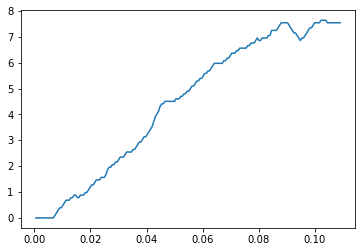

In [4]:
plt.plot(strain_rh5, stress_rh5)

In [5]:
HR_list = np.load('./seg_results/r-H-5.npz',allow_pickle=True)

In [6]:
area_change_lists_array = HR_list['area_change']
ecc_change_lists_array = HR_list['ecc_change']
cir_change_lists_array = HR_list['cir_change']
major_change_lists_array = HR_list['major_change']
minor_change_lists_array = HR_list['minor_change']
aspect_axis_change_lists_array = HR_list['aspect_axis_change']
hori_change_lists_array = HR_list['hori_change']
vert_change_lists_array = HR_list['vert_change']
aspect_bbox_change_lists_array = HR_list['aspect_bbox_change']
feret_change_lists_array = HR_list['feret_change']

In [7]:
particle_area_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(area_change_lists_array))
particle_ecc_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(ecc_change_lists_array))
particle_cir_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(cir_change_lists_array))
particle_major_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(major_change_lists_array))
particle_minor_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(minor_change_lists_array))
particle_aspect_axis_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(aspect_axis_change_lists_array))
particle_hori_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(hori_change_lists_array))
particle_vert_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(vert_change_lists_array))
particle_aspect_bbox_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(aspect_bbox_change_lists_array))
particle_feret_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(feret_change_lists_array))

100%|████████████████████████████████████| 6010/6010 [00:00<00:00, 14126.12it/s]


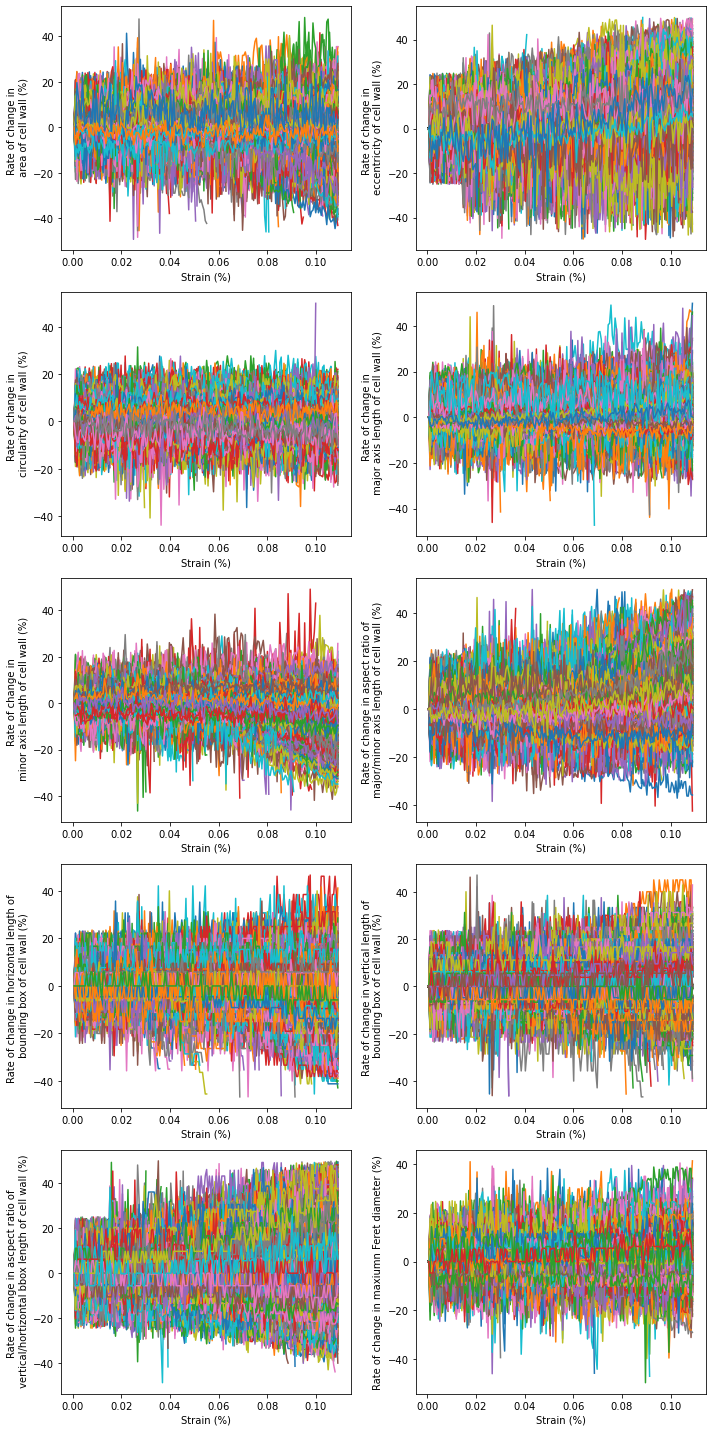

In [12]:
list_dict = {'particle_area_change_lists_mod'}
fig, ax = plt.subplots(5,2,figsize=(10,20))

for i in range(len(particle_area_change_rate_lists_mod)):
    ax[0,0].plot(strain_rh5[0:len(particle_area_change_rate_lists_mod[i])], particle_area_change_rate_lists_mod[i])
    ax[0,0].set_xlabel('Strain (%)')
    ax[0,0].set_ylabel('Rate of change in \n area of cell wall (%)')
    
for j in range(len(particle_ecc_change_rate_lists_mod)):
    ax[0,1].plot(strain_rh5[0:len(particle_ecc_change_rate_lists_mod[j])], particle_ecc_change_rate_lists_mod[j])
    ax[0,1].set_xlabel('Strain (%)')
    ax[0,1].set_ylabel('Rate of change in \n eccentricity of cell wall (%)')

for k in range(len(particle_cir_change_rate_lists_mod)):
    ax[1,0].plot(strain_rh5[0:len(particle_cir_change_rate_lists_mod[k])], particle_cir_change_rate_lists_mod[k])
    ax[1,0].set_xlabel('Strain (%)')
    ax[1,0].set_ylabel('Rate of change in \n circularity of cell wall (%)')

for k in range(len(particle_major_change_rate_lists_mod)):
    ax[1,1].plot(strain_rh5[0:len(particle_major_change_rate_lists_mod[k])], particle_major_change_rate_lists_mod[k])
    ax[1,1].set_xlabel('Strain (%)')
    ax[1,1].set_ylabel('Rate of change in \n major axis length of cell wall (%)')
    
for l in range(len(particle_minor_change_rate_lists_mod)):
    ax[2,0].plot(strain_rh5[0:len(particle_minor_change_rate_lists_mod[l])], particle_minor_change_rate_lists_mod[l])
    ax[2,0].set_xlabel('Strain (%)')
    ax[2,0].set_ylabel('Rate of change in \n minor axis length of cell wall (%)')

for l in range(len(particle_aspect_axis_change_rate_lists_mod)):
    ax[2,1].plot(strain_rh5[0:len(particle_aspect_axis_change_rate_lists_mod[l])], particle_aspect_axis_change_rate_lists_mod[l])
    ax[2,1].set_xlabel('Strain (%)')
    ax[2,1].set_ylabel('Rate of change in aspect ratio of \n major/minor axis length of cell wall (%)')

for m in range(len(particle_hori_change_rate_lists_mod)):
    ax[3,0].plot(strain_rh5[0:len(particle_hori_change_rate_lists_mod[m])], particle_hori_change_rate_lists_mod[m])
    ax[3,0].set_xlabel('Strain (%)')
    ax[3,0].set_ylabel('Rate of change in horizontal length of \n bounding box of cell wall (%)')
    
for n in range(len(particle_vert_change_rate_lists_mod)):
    ax[3,1].plot(strain_rh5[0:len(particle_vert_change_rate_lists_mod[n])], particle_vert_change_rate_lists_mod[n])
    ax[3,1].set_xlabel('Strain (%)')
    ax[3,1].set_ylabel('Rate of change in vertical length of \n bounding box of cell wall (%)')
    
for l in range(len(particle_aspect_bbox_change_rate_lists_mod)):
    ax[4,0].plot(strain_rh5[0:len(particle_aspect_bbox_change_rate_lists_mod[l])], particle_aspect_bbox_change_rate_lists_mod[l])
    ax[4,0].set_xlabel('Strain (%)')
    ax[4,0].set_ylabel('Rate of change in ascpect ratio of \n vertical/hortizontal bbox length of cell wall (%)')
    
for o in range(len(particle_feret_change_rate_lists_mod)):
    ax[4,1].plot(strain_rh5[0:len(particle_feret_change_rate_lists_mod[o])], particle_feret_change_rate_lists_mod[o])
    ax[4,1].set_xlabel('Strain (%)')
    ax[4,1].set_ylabel('Rate of change in maxiumn Feret diameter (%)')
    
fig.tight_layout()

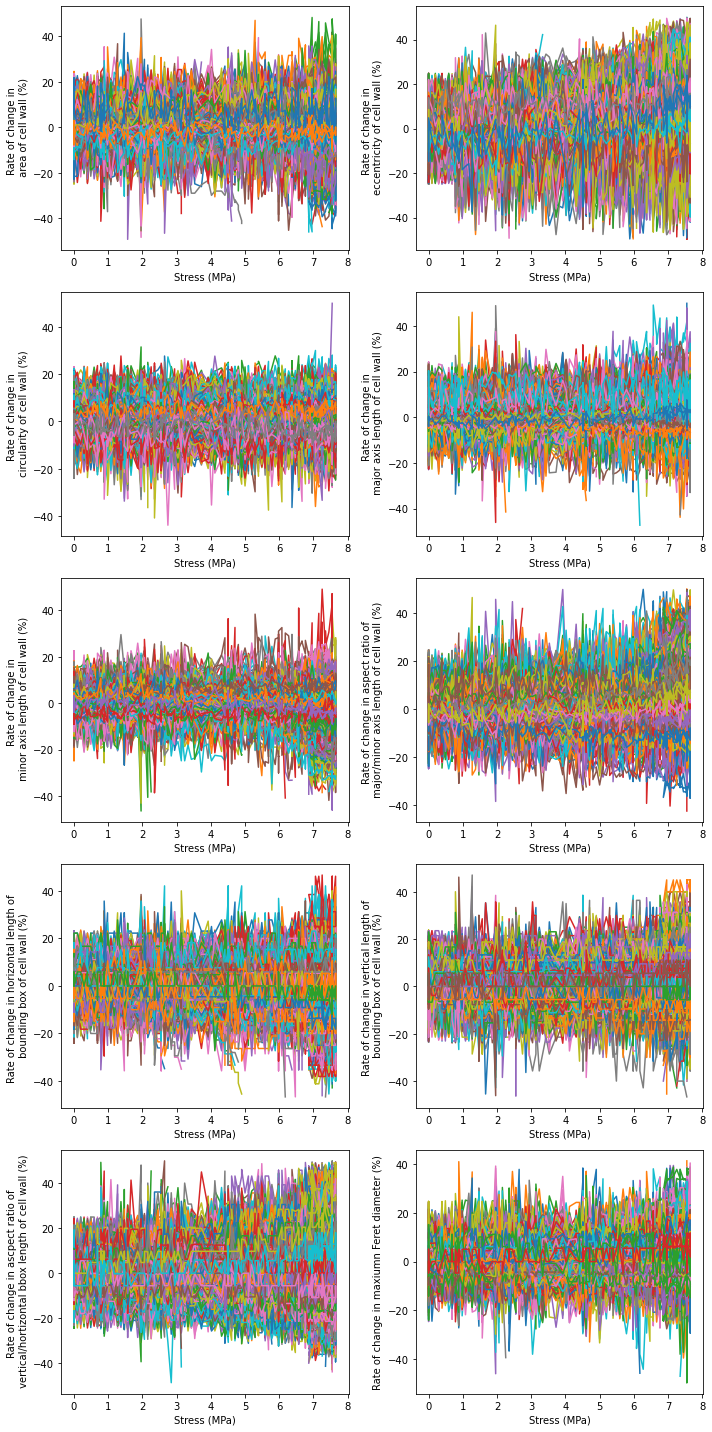

In [17]:
list_dict = {'particle_area_change_lists_mod'}
fig, ax = plt.subplots(5,2,figsize=(10,20))

for i in range(len(particle_area_change_rate_lists_mod)):
    ax[0,0].plot(stress_rh5[0:len(particle_area_change_rate_lists_mod[i])], particle_area_change_rate_lists_mod[i])
    ax[0,0].set_xlabel('Stress (MPa)')
    ax[0,0].set_ylabel('Rate of change in \n area of cell wall (%)')
    
for j in range(len(particle_ecc_change_rate_lists_mod)):
    ax[0,1].plot(stress_rh5[0:len(particle_ecc_change_rate_lists_mod[j])], particle_ecc_change_rate_lists_mod[j])
    ax[0,1].set_xlabel('Stress (MPa)')
    ax[0,1].set_ylabel('Rate of change in \n eccentricity of cell wall (%)')

for k in range(len(particle_cir_change_rate_lists_mod)):
    ax[1,0].plot(stress_rh5[0:len(particle_cir_change_rate_lists_mod[k])], particle_cir_change_rate_lists_mod[k])
    ax[1,0].set_xlabel('Stress (MPa)')
    ax[1,0].set_ylabel('Rate of change in \n circularity of cell wall (%)')

for k in range(len(particle_major_change_rate_lists_mod)):
    ax[1,1].plot(stress_rh5[0:len(particle_major_change_rate_lists_mod[k])], particle_major_change_rate_lists_mod[k])
    ax[1,1].set_xlabel('Stress (MPa)')
    ax[1,1].set_ylabel('Rate of change in \n major axis length of cell wall (%)')
    
for l in range(len(particle_minor_change_rate_lists_mod)):
    ax[2,0].plot(stress_rh5[0:len(particle_minor_change_rate_lists_mod[l])], particle_minor_change_rate_lists_mod[l])
    ax[2,0].set_xlabel('Stress (MPa)')
    ax[2,0].set_ylabel('Rate of change in \n minor axis length of cell wall (%)')

for l in range(len(particle_aspect_axis_change_rate_lists_mod)):
    ax[2,1].plot(stress_rh5[0:len(particle_aspect_axis_change_rate_lists_mod[l])], particle_aspect_axis_change_rate_lists_mod[l])
    ax[2,1].set_xlabel('Stress (MPa)')
    ax[2,1].set_ylabel('Rate of change in aspect ratio of \n major/minor axis length of cell wall (%)')

for m in range(len(particle_hori_change_rate_lists_mod)):
    ax[3,0].plot(stress_rh5[0:len(particle_hori_change_rate_lists_mod[m])], particle_hori_change_rate_lists_mod[m])
    ax[3,0].set_xlabel('Stress (MPa)')
    ax[3,0].set_ylabel('Rate of change in horizontal length of \n bounding box of cell wall (%)')
    
for n in range(len(particle_vert_change_rate_lists_mod)):
    ax[3,1].plot(stress_rh5[0:len(particle_vert_change_rate_lists_mod[n])], particle_vert_change_rate_lists_mod[n])
    ax[3,1].set_xlabel('Stress (MPa)')
    ax[3,1].set_ylabel('Rate of change in vertical length of \n bounding box of cell wall (%)')
    
for l in range(len(particle_aspect_bbox_change_rate_lists_mod)):
    ax[4,0].plot(stress_rh5[0:len(particle_aspect_bbox_change_rate_lists_mod[l])], particle_aspect_bbox_change_rate_lists_mod[l])
    ax[4,0].set_xlabel('Stress (MPa)')
    ax[4,0].set_ylabel('Rate of change in ascpect ratio of \n vertical/hortizontal bbox length of cell wall (%)')
    
for o in range(len(particle_feret_change_rate_lists_mod)):
    ax[4,1].plot(stress_rh5[0:len(particle_feret_change_rate_lists_mod[o])], particle_feret_change_rate_lists_mod[o])
    ax[4,1].set_xlabel('Stress (MPa)')
    ax[4,1].set_ylabel('Rate of change in maxiumn Feret diameter (%)')
    
fig.tight_layout()

In [73]:
dis_area_change_rate_array_mod = make_distribution(area_change_lists_array,thr_min=-50, thr_max=50)
dis_ecc_change_rate_array_mod = make_distribution(ecc_change_lists_array,thr_min=-50, thr_max=50)
dis_cir_change_rate_array_mod = make_distribution(cir_change_lists_array,thr_min=-50, thr_max=50)
dis_major_change_rate_array_mod = make_distribution(major_change_lists_array,thr_min=-50, thr_max=50)
dis_minor_change_rate_array_mod = make_distribution(minor_change_lists_array,thr_min=-50, thr_max=50)
dis_aspect_axis_change_array_lists_mod = make_distribution(aspect_axis_change_lists_array,thr_min=-50, thr_max=50)
dis_hori_change_rate_array_mod = make_distribution(hori_change_lists_array,thr_min=-50, thr_max=50)
dis_vert_change_rate_array_mod = make_distribution(vert_change_lists_array,thr_min=-50, thr_max=50)
dis_aspect_bbox_change_rate_array_mod = make_distribution(aspect_bbox_change_lists_array,thr_min=-50, thr_max=50)
dis_feret_change_rate_array_mod = make_distribution(feret_change_lists_array,thr_min=-50, thr_max=50)

100%|███████████████████████████████████████| 191/191 [00:00<00:00, 8352.31it/s]


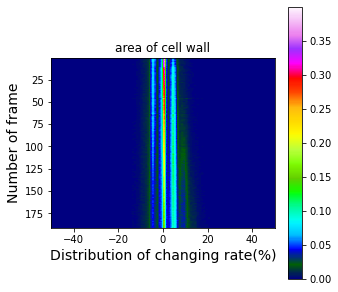

In [74]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
im = ax.imshow(dis_feret_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
ax.set_title('area of cell wall')
ax.set_ylabel('Number of frame',fontsize=14)
ax.set_xlabel('Distribution of changing rate(%)', fontsize=14)
fig.colorbar(im, ax=ax)

In [115]:
# fig, ax = plt.subplots(5,2,figsize=(10,20))
# ax[0,0].imshow(dis_area_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[0,0].set_title('area of cell wall')
# ax[0,0].set_ylabel('Number of frame',fontsize=14)
# ax[0,0].set_xlabel('Distribution of changing rate(%)', fontsize=14)

# ax[0,1].imshow(dis_ecc_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[0,1].set_title('eccentricity of cell wall')

# ax[1,0].imshow(dis_cir_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[1,0].set_title('circularity of cell wall')

# ax[1,1].imshow(dis_major_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[1,1].set_title('major axis length of cell wall')

# ax[2,0].imshow(dis_minor_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[2,0].set_title('minor axis length of cell wall')

# ax[2,1].imshow(dis_aspect_axis_change_array_lists_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[2,1].set_title('aspect ratio of major/ minor axis length of cell wall')

# ax[3,0].imshow(dis_hori_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[3,0].set_title('horizontal length of bounding box of cell wall')

# ax[3,1].imshow(dis_vert_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[3,1].set_title('vertical length of bounding box of cell wall')

# ax[4,0].imshow(dis_aspect_bbox_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[4,0].set_title('aspect ratio of vertical/horiztonal length of cell wall')

# ax[4,1].imshow(dis_feret_change_rate_array_mod, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.4')
# ax[4,1].set_title('maxiumn feret diameter of cell wall')

# fig.tight_layout()

100%|██████████████████████████████████████| 191/191 [00:00<00:00, 10547.19it/s]


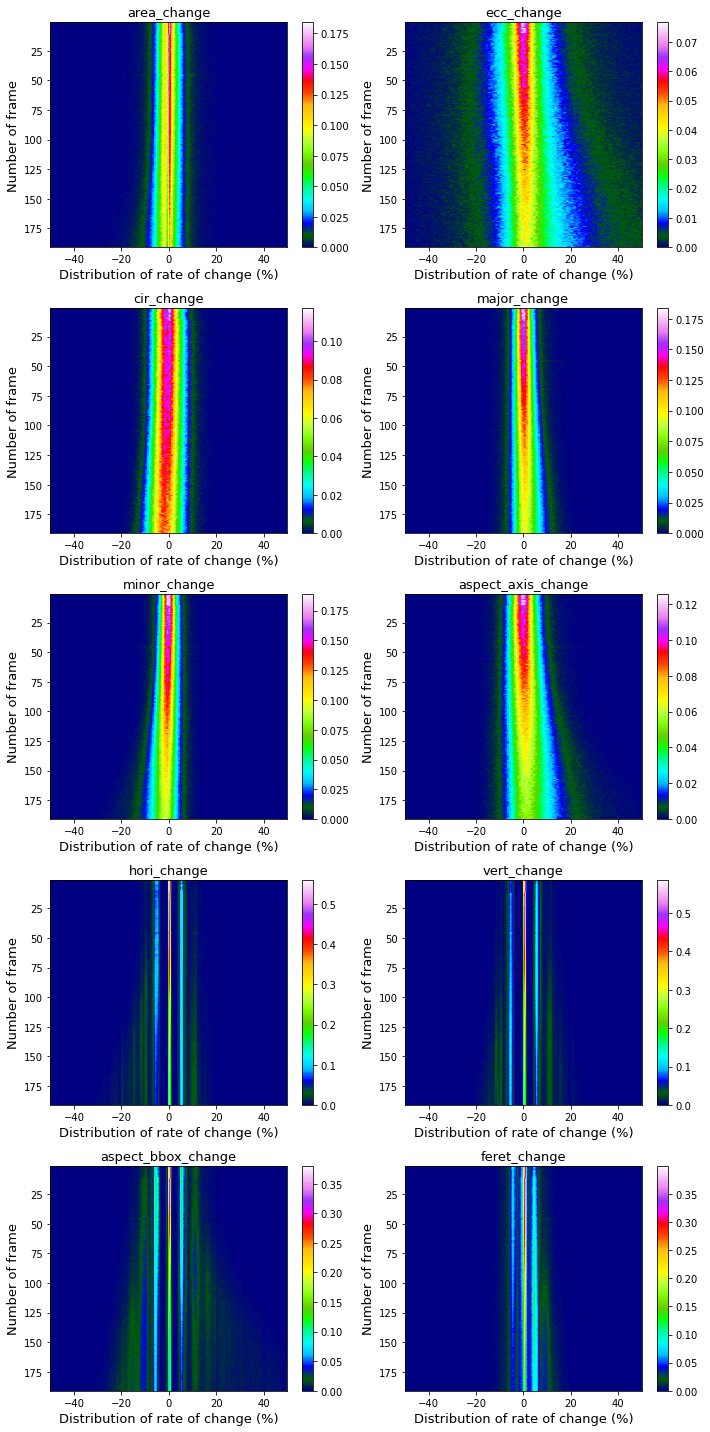

In [83]:
list_name = ['area_change', 'ecc_change', 'cir_change', 'major_change', 'minor_change', 'aspect_axis_change',
            'hori_change', 'vert_change', 'aspect_bbox_change', 'feret_change']

fig, ax = plt.subplots(5,2,figsize=(10,20))
for i, ax in zip(range(len(list_name)), ax.flat):
    change_lists_array = HR_list[list_name[i]]
    dis_change_list_array = make_distribution(change_lists_array,thr_min=-50, thr_max=50)
    
    im = ax.imshow(dis_change_list_array, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.5')
    ax.set_ylabel('Number of frame', fontsize=13)
    ax.set_xlabel('Distribution of rate of change (%)',fontsize=13)
    ax.set_title(list_name[i], fontsize=13)
    fig.colorbar(im, ax=ax)    
fig.tight_layout()

#### HF-4

In [101]:
col_names = ["s", "V"]
df_ss = pd.read_csv("HF-4.CSV", names=col_names)

span = 16/1000
width = 9.84333/1000
thick = 1.54000/1000

load =[]
stress_hf4 = []

V = df_ss.V[:192]
load = (10/(5000*2.5*(46.67*10**-6)))*-V
stress_hf4 = (3*load*span)/(2*width*thick**2)/10**6

displacement = []
strain_hf4 = []

s = df_ss.s[:192]
displacement = s*(1/60)
strain_hf4 = (6*thick*displacement/1000)/(span**2)

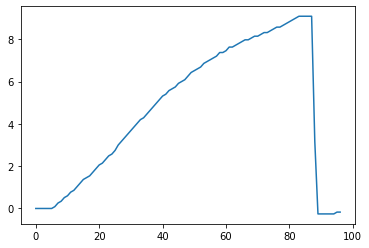

In [102]:
plt.plot(load)

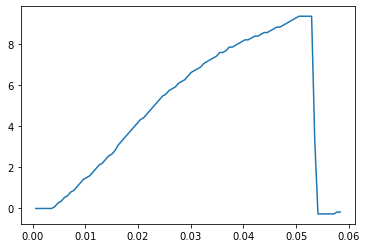

In [87]:
plt.plot(strain_hf4, stress_hf4)

In [88]:
HF_list = np.load('./seg_results/HF-4.npz',allow_pickle=True)

In [89]:
area_change_lists_array = HF_list['area_change']
ecc_change_lists_array = HF_list['ecc_change']
cir_change_lists_array = HF_list['cir_change']
major_change_lists_array = HF_list['major_change']
minor_change_lists_array = HF_list['minor_change']
aspect_axis_change_lists_array = HF_list['aspect_axis_change']
hori_change_lists_array = HF_list['hori_change']
vert_change_lists_array = HF_list['vert_change']
aspect_bbox_change_lists_array = HF_list['aspect_bbox_change']
feret_change_lists_array = HF_list['feret_change']

In [90]:
particle_area_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(area_change_lists_array))
particle_ecc_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(ecc_change_lists_array))
particle_cir_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(cir_change_lists_array))
particle_major_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(major_change_lists_array))
particle_minor_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(minor_change_lists_array))
particle_aspect_axis_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(aspect_axis_change_lists_array))
particle_hori_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(hori_change_lists_array))
particle_vert_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(vert_change_lists_array))
particle_aspect_bbox_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(aspect_bbox_change_lists_array))
particle_feret_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(feret_change_lists_array))

100%|████████████████████████████████████| 6049/6049 [00:00<00:00, 30667.43it/s]


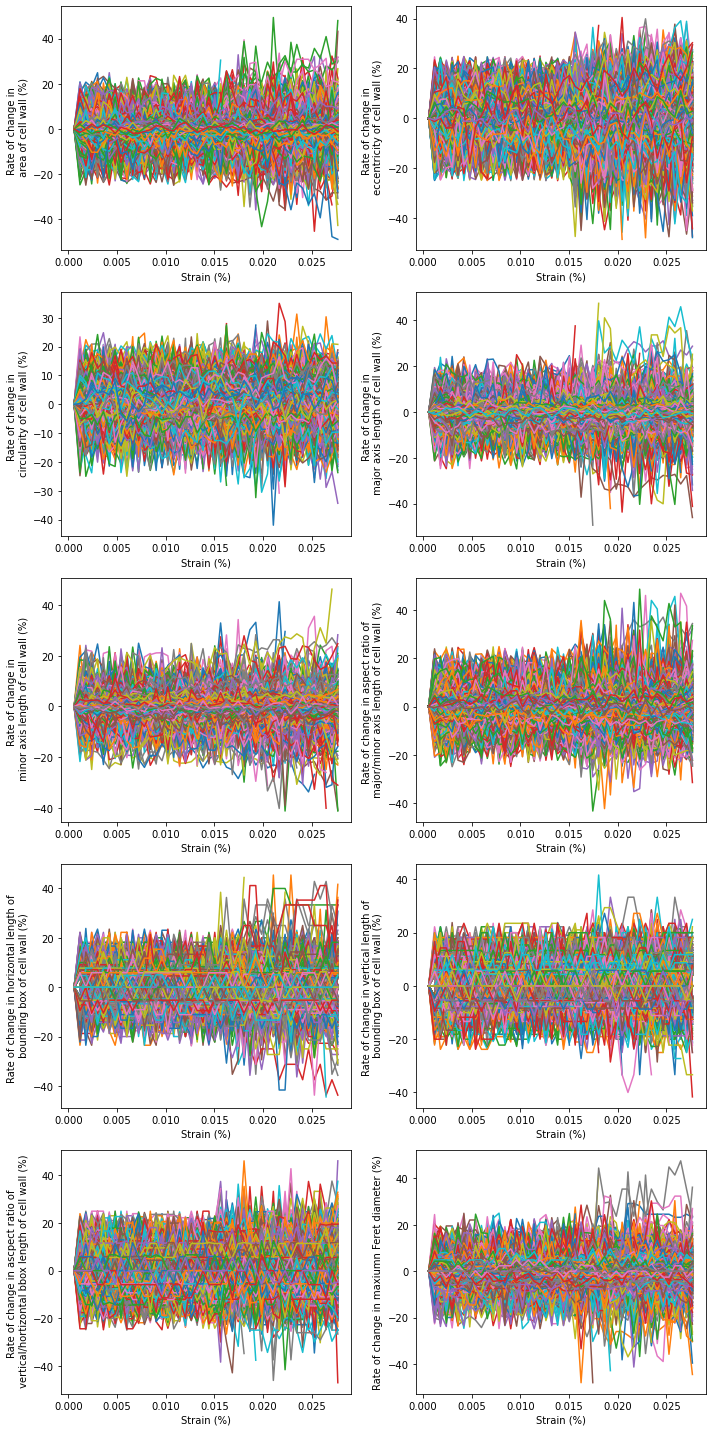

In [91]:
list_dict = {'particle_area_change_lists_mod'}
fig, ax = plt.subplots(5,2,figsize=(10,20))

for i in range(len(particle_area_change_rate_lists_mod)):
    ax[0,0].plot(strain_hf4[0:len(particle_area_change_rate_lists_mod[i])], particle_area_change_rate_lists_mod[i])
    ax[0,0].set_xlabel('Strain (%)')
    ax[0,0].set_ylabel('Rate of change in \n area of cell wall (%)')
    
for j in range(len(particle_ecc_change_rate_lists_mod)):
    ax[0,1].plot(strain_hf4[0:len(particle_ecc_change_rate_lists_mod[j])], particle_ecc_change_rate_lists_mod[j])
    ax[0,1].set_xlabel('Strain (%)')
    ax[0,1].set_ylabel('Rate of change in \n eccentricity of cell wall (%)')

for k in range(len(particle_cir_change_rate_lists_mod)):
    ax[1,0].plot(strain_hf4[0:len(particle_cir_change_rate_lists_mod[k])], particle_cir_change_rate_lists_mod[k])
    ax[1,0].set_xlabel('Strain (%)')
    ax[1,0].set_ylabel('Rate of change in \n circularity of cell wall (%)')

for k in range(len(particle_major_change_rate_lists_mod)):
    ax[1,1].plot(strain_hf4[0:len(particle_major_change_rate_lists_mod[k])], particle_major_change_rate_lists_mod[k])
    ax[1,1].set_xlabel('Strain (%)')
    ax[1,1].set_ylabel('Rate of change in \n major axis length of cell wall (%)')
    
for l in range(len(particle_minor_change_rate_lists_mod)):
    ax[2,0].plot(strain_hf4[0:len(particle_minor_change_rate_lists_mod[l])], particle_minor_change_rate_lists_mod[l])
    ax[2,0].set_xlabel('Strain (%)')
    ax[2,0].set_ylabel('Rate of change in \n minor axis length of cell wall (%)')

for l in range(len(particle_aspect_axis_change_rate_lists_mod)):
    ax[2,1].plot(strain_hf4[0:len(particle_aspect_axis_change_rate_lists_mod[l])], particle_aspect_axis_change_rate_lists_mod[l])
    ax[2,1].set_xlabel('Strain (%)')
    ax[2,1].set_ylabel('Rate of change in aspect ratio of \n major/minor axis length of cell wall (%)')

for m in range(len(particle_hori_change_rate_lists_mod)):
    ax[3,0].plot(strain_hf4[0:len(particle_hori_change_rate_lists_mod[m])], particle_hori_change_rate_lists_mod[m])
    ax[3,0].set_xlabel('Strain (%)')
    ax[3,0].set_ylabel('Rate of change in horizontal length of \n bounding box of cell wall (%)')
    
for n in range(len(particle_vert_change_rate_lists_mod)):
    ax[3,1].plot(strain_hf4[0:len(particle_vert_change_rate_lists_mod[n])], particle_vert_change_rate_lists_mod[n])
    ax[3,1].set_xlabel('Strain (%)')
    ax[3,1].set_ylabel('Rate of change in vertical length of \n bounding box of cell wall (%)')
    
for l in range(len(particle_aspect_bbox_change_rate_lists_mod)):
    ax[4,0].plot(strain_hf4[0:len(particle_aspect_bbox_change_rate_lists_mod[l])], particle_aspect_bbox_change_rate_lists_mod[l])
    ax[4,0].set_xlabel('Strain (%)')
    ax[4,0].set_ylabel('Rate of change in ascpect ratio of \n vertical/hortizontal bbox length of cell wall (%)')
    
for o in range(len(particle_feret_change_rate_lists_mod)):
    ax[4,1].plot(strain_hf4[0:len(particle_feret_change_rate_lists_mod[o])], particle_feret_change_rate_lists_mod[o])
    ax[4,1].set_xlabel('Strain (%)')
    ax[4,1].set_ylabel('Rate of change in maxiumn Feret diameter (%)')
    
fig.tight_layout()

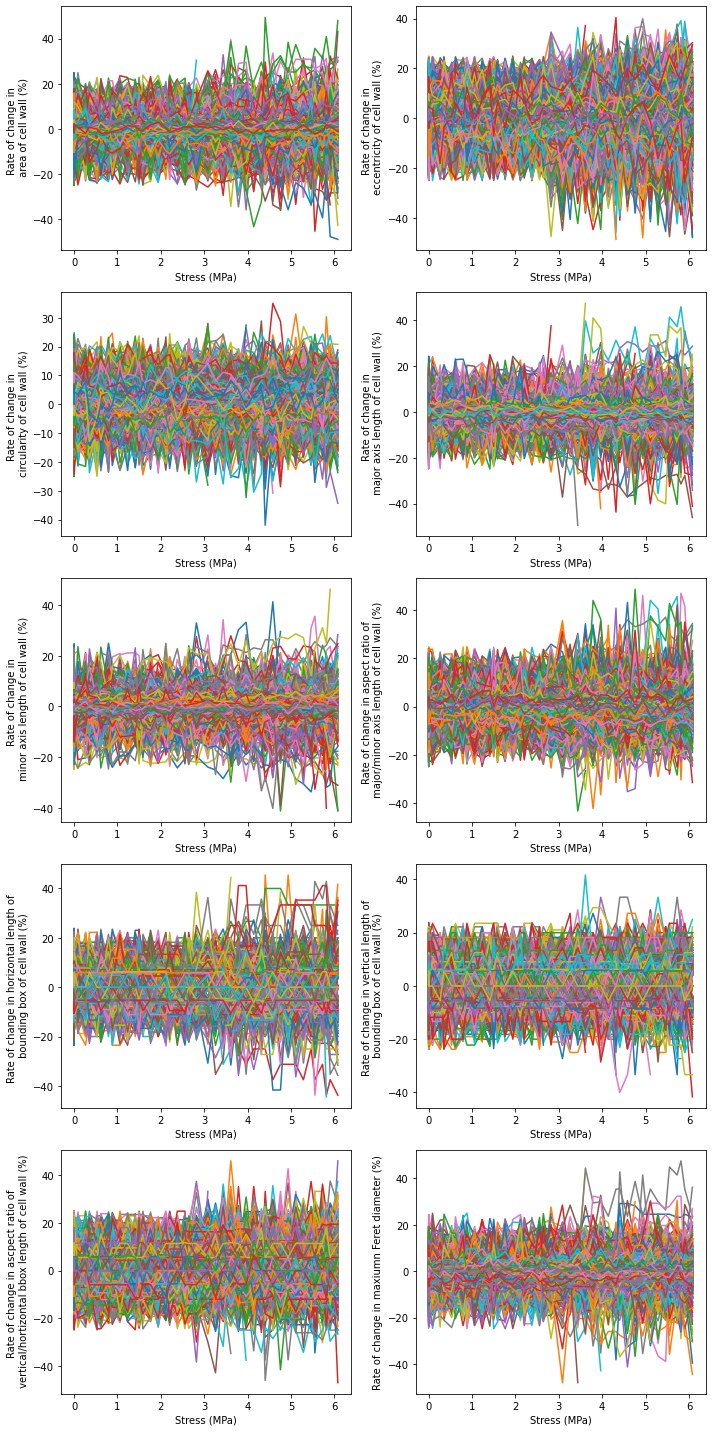

In [92]:
list_dict = {'particle_area_change_lists_mod'}
fig, ax = plt.subplots(5,2,figsize=(10,20))

for i in range(len(particle_area_change_rate_lists_mod)):
    ax[0,0].plot(stress_hf4[0:len(particle_area_change_rate_lists_mod[i])], particle_area_change_rate_lists_mod[i])
    ax[0,0].set_xlabel('Stress (MPa)')
    ax[0,0].set_ylabel('Rate of change in \n area of cell wall (%)')
    
for j in range(len(particle_ecc_change_rate_lists_mod)):
    ax[0,1].plot(stress_hf4[0:len(particle_ecc_change_rate_lists_mod[j])], particle_ecc_change_rate_lists_mod[j])
    ax[0,1].set_xlabel('Stress (MPa)')
    ax[0,1].set_ylabel('Rate of change in \n eccentricity of cell wall (%)')

for k in range(len(particle_cir_change_rate_lists_mod)):
    ax[1,0].plot(stress_hf4[0:len(particle_cir_change_rate_lists_mod[k])], particle_cir_change_rate_lists_mod[k])
    ax[1,0].set_xlabel('Stress (MPa)')
    ax[1,0].set_ylabel('Rate of change in \n circularity of cell wall (%)')

for k in range(len(particle_major_change_rate_lists_mod)):
    ax[1,1].plot(stress_hf4[0:len(particle_major_change_rate_lists_mod[k])], particle_major_change_rate_lists_mod[k])
    ax[1,1].set_xlabel('Stress (MPa)')
    ax[1,1].set_ylabel('Rate of change in \n major axis length of cell wall (%)')
    
for l in range(len(particle_minor_change_rate_lists_mod)):
    ax[2,0].plot(stress_hf4[0:len(particle_minor_change_rate_lists_mod[l])], particle_minor_change_rate_lists_mod[l])
    ax[2,0].set_xlabel('Stress (MPa)')
    ax[2,0].set_ylabel('Rate of change in \n minor axis length of cell wall (%)')

for l in range(len(particle_aspect_axis_change_rate_lists_mod)):
    ax[2,1].plot(stress_hf4[0:len(particle_aspect_axis_change_rate_lists_mod[l])], particle_aspect_axis_change_rate_lists_mod[l])
    ax[2,1].set_xlabel('Stress (MPa)')
    ax[2,1].set_ylabel('Rate of change in aspect ratio of \n major/minor axis length of cell wall (%)')

for m in range(len(particle_hori_change_rate_lists_mod)):
    ax[3,0].plot(stress_hf4[0:len(particle_hori_change_rate_lists_mod[m])], particle_hori_change_rate_lists_mod[m])
    ax[3,0].set_xlabel('Stress (MPa)')
    ax[3,0].set_ylabel('Rate of change in horizontal length of \n bounding box of cell wall (%)')
    
for n in range(len(particle_vert_change_rate_lists_mod)):
    ax[3,1].plot(stress_hf4[0:len(particle_vert_change_rate_lists_mod[n])], particle_vert_change_rate_lists_mod[n])
    ax[3,1].set_xlabel('Stress (MPa)')
    ax[3,1].set_ylabel('Rate of change in vertical length of \n bounding box of cell wall (%)')
    
for l in range(len(particle_aspect_bbox_change_rate_lists_mod)):
    ax[4,0].plot(stress_hf4[0:len(particle_aspect_bbox_change_rate_lists_mod[l])], particle_aspect_bbox_change_rate_lists_mod[l])
    ax[4,0].set_xlabel('Stress (MPa)')
    ax[4,0].set_ylabel('Rate of change in ascpect ratio of \n vertical/hortizontal bbox length of cell wall (%)')
    
for o in range(len(particle_feret_change_rate_lists_mod)):
    ax[4,1].plot(stress_hf4[0:len(particle_feret_change_rate_lists_mod[o])], particle_feret_change_rate_lists_mod[o])
    ax[4,1].set_xlabel('Stress (MPa)')
    ax[4,1].set_ylabel('Rate of change in maxiumn Feret diameter (%)')
    
fig.tight_layout()

In [93]:
dis_area_change_rate_array_mod = make_distribution(area_change_lists_array,thr_min=-50, thr_max=50)
dis_ecc_change_rate_array_mod = make_distribution(ecc_change_lists_array,thr_min=-50, thr_max=50)
dis_cir_change_rate_array_mod = make_distribution(cir_change_lists_array,thr_min=-50, thr_max=50)
dis_major_change_rate_array_mod = make_distribution(major_change_lists_array,thr_min=-50, thr_max=50)
dis_minor_change_rate_array_mod = make_distribution(minor_change_lists_array,thr_min=-50, thr_max=50)
dis_aspect_axis_change_array_lists_mod = make_distribution(aspect_axis_change_lists_array,thr_min=-50, thr_max=50)
dis_hori_change_rate_array_mod = make_distribution(hori_change_lists_array,thr_min=-50, thr_max=50)
dis_vert_change_rate_array_mod = make_distribution(vert_change_lists_array,thr_min=-50, thr_max=50)
dis_aspect_bbox_change_rate_array_mod = make_distribution(aspect_bbox_change_lists_array,thr_min=-50, thr_max=50)
dis_feret_change_rate_array_mod = make_distribution(feret_change_lists_array,thr_min=-50, thr_max=50)

/Users/chen/miniforge3/envs/dl-chen/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
100%|█████████████████████████████████████████| 45/45 [00:00<00:00, 8880.80it/s]


100%|█████████████████████████████████████████| 45/45 [00:00<00:00, 8994.65it/s]


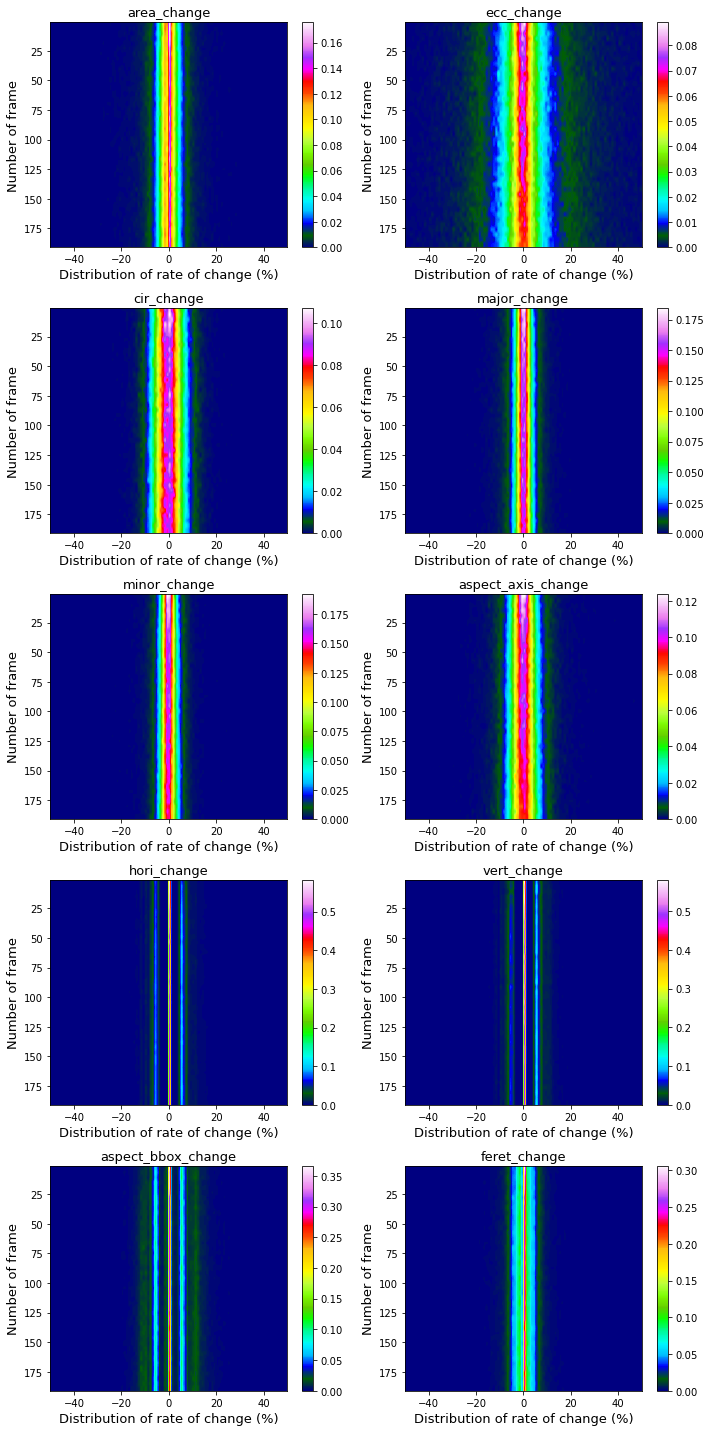

In [96]:
list_name = ['area_change', 'ecc_change', 'cir_change', 'major_change', 'minor_change', 'aspect_axis_change',
            'hori_change', 'vert_change', 'aspect_bbox_change', 'feret_change']

fig, ax = plt.subplots(5,2,figsize=(10,20))
for i, ax in zip(range(len(list_name)), ax.flat):
    change_lists_array = HF_list[list_name[i]]
    dis_change_list_array = make_distribution(change_lists_array,thr_min=-50, thr_max=50)
    
    im = ax.imshow(dis_change_list_array, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.5')
    ax.set_ylabel('Number of frame', fontsize=13)
    ax.set_xlabel('Distribution of rate of change (%)',fontsize=13)
    ax.set_title(list_name[i], fontsize=13)
    fig.colorbar(im, ax=ax)    
fig.tight_layout()

#### q-H-2

In [104]:
col_names = ["s", "V"]
df_ss = pd.read_csv("q-H-2.CSV", names=col_names)

span = 16/1000
width = 9.836666667/1000
thick = 1.613333333/1000

load =[]
stress_hf4 = []

V = df_ss.V[:192]
load = (10/(5000*2.5*(46.67*10**-6)))*-V
stress_qh2 = (3*load*span)/(2*width*thick**2)/10**6

displacement = []
strain_qh2 = []

s = df_ss.s[:192]
displacement = s*(1/60)
strain_qh2 = (6*thick*displacement/1000)/(span**2)

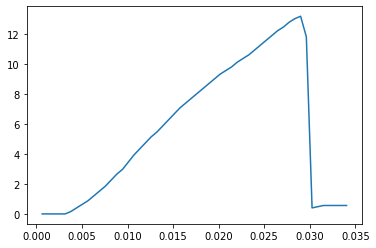

In [106]:
plt.plot(strain_qh2, stress_qh2)

In [107]:
HQ_list = np.load('./seg_results/q-H-2.npz',allow_pickle=True)

In [108]:
area_change_lists_array = HQ_list['area_change']
ecc_change_lists_array = HQ_list['ecc_change']
cir_change_lists_array = HQ_list['cir_change']
major_change_lists_array = HQ_list['major_change']
minor_change_lists_array = HQ_list['minor_change']
aspect_axis_change_lists_array = HQ_list['aspect_axis_change']
hori_change_lists_array = HQ_list['hori_change']
vert_change_lists_array = HQ_list['vert_change']
aspect_bbox_change_lists_array = HQ_list['aspect_bbox_change']
feret_change_lists_array = HQ_list['feret_change']

In [109]:
particle_area_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(area_change_lists_array))
particle_ecc_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(ecc_change_lists_array))
particle_cir_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(cir_change_lists_array))
particle_major_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(major_change_lists_array))
particle_minor_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(minor_change_lists_array))
particle_aspect_axis_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(aspect_axis_change_lists_array))
particle_hori_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(hori_change_lists_array))
particle_vert_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(vert_change_lists_array))
particle_aspect_bbox_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(aspect_bbox_change_lists_array))
particle_feret_change_rate_lists_mod = modify_change_rate_lists(make_particle_change_lists(feret_change_lists_array))

100%|████████████████████████████████████| 6049/6049 [00:00<00:00, 31452.26it/s]


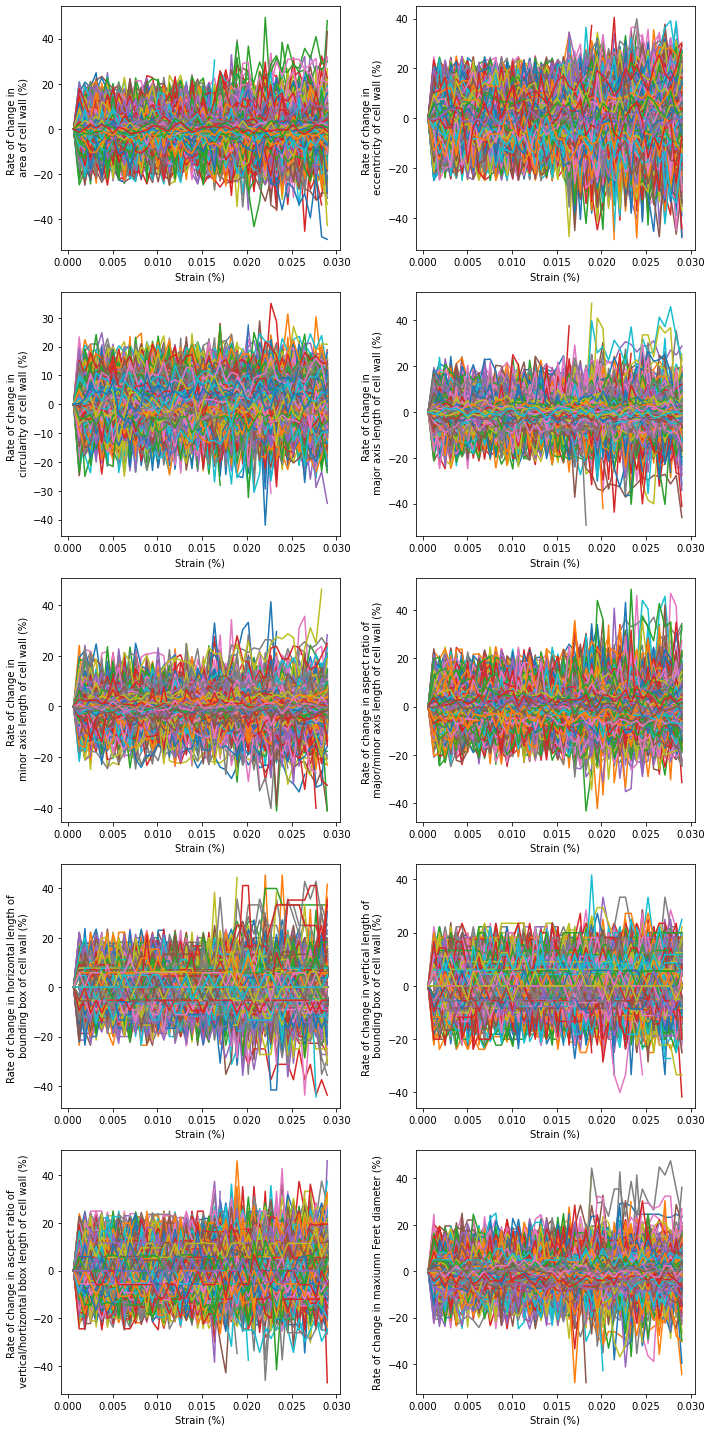

In [110]:
list_dict = {'particle_area_change_lists_mod'}
fig, ax = plt.subplots(5,2,figsize=(10,20))

for i in range(len(particle_area_change_rate_lists_mod)):
    ax[0,0].plot(strain_qh2[0:len(particle_area_change_rate_lists_mod[i])], particle_area_change_rate_lists_mod[i])
    ax[0,0].set_xlabel('Strain (%)')
    ax[0,0].set_ylabel('Rate of change in \n area of cell wall (%)')
    
for j in range(len(particle_ecc_change_rate_lists_mod)):
    ax[0,1].plot(strain_qh2[0:len(particle_ecc_change_rate_lists_mod[j])], particle_ecc_change_rate_lists_mod[j])
    ax[0,1].set_xlabel('Strain (%)')
    ax[0,1].set_ylabel('Rate of change in \n eccentricity of cell wall (%)')

for k in range(len(particle_cir_change_rate_lists_mod)):
    ax[1,0].plot(strain_qh2[0:len(particle_cir_change_rate_lists_mod[k])], particle_cir_change_rate_lists_mod[k])
    ax[1,0].set_xlabel('Strain (%)')
    ax[1,0].set_ylabel('Rate of change in \n circularity of cell wall (%)')

for k in range(len(particle_major_change_rate_lists_mod)):
    ax[1,1].plot(strain_qh2[0:len(particle_major_change_rate_lists_mod[k])], particle_major_change_rate_lists_mod[k])
    ax[1,1].set_xlabel('Strain (%)')
    ax[1,1].set_ylabel('Rate of change in \n major axis length of cell wall (%)')
    
for l in range(len(particle_minor_change_rate_lists_mod)):
    ax[2,0].plot(strain_qh2[0:len(particle_minor_change_rate_lists_mod[l])], particle_minor_change_rate_lists_mod[l])
    ax[2,0].set_xlabel('Strain (%)')
    ax[2,0].set_ylabel('Rate of change in \n minor axis length of cell wall (%)')

for l in range(len(particle_aspect_axis_change_rate_lists_mod)):
    ax[2,1].plot(strain_qh2[0:len(particle_aspect_axis_change_rate_lists_mod[l])], particle_aspect_axis_change_rate_lists_mod[l])
    ax[2,1].set_xlabel('Strain (%)')
    ax[2,1].set_ylabel('Rate of change in aspect ratio of \n major/minor axis length of cell wall (%)')

for m in range(len(particle_hori_change_rate_lists_mod)):
    ax[3,0].plot(strain_qh2[0:len(particle_hori_change_rate_lists_mod[m])], particle_hori_change_rate_lists_mod[m])
    ax[3,0].set_xlabel('Strain (%)')
    ax[3,0].set_ylabel('Rate of change in horizontal length of \n bounding box of cell wall (%)')
    
for n in range(len(particle_vert_change_rate_lists_mod)):
    ax[3,1].plot(strain_qh2[0:len(particle_vert_change_rate_lists_mod[n])], particle_vert_change_rate_lists_mod[n])
    ax[3,1].set_xlabel('Strain (%)')
    ax[3,1].set_ylabel('Rate of change in vertical length of \n bounding box of cell wall (%)')
    
for l in range(len(particle_aspect_bbox_change_rate_lists_mod)):
    ax[4,0].plot(strain_qh2[0:len(particle_aspect_bbox_change_rate_lists_mod[l])], particle_aspect_bbox_change_rate_lists_mod[l])
    ax[4,0].set_xlabel('Strain (%)')
    ax[4,0].set_ylabel('Rate of change in ascpect ratio of \n vertical/hortizontal bbox length of cell wall (%)')
    
for o in range(len(particle_feret_change_rate_lists_mod)):
    ax[4,1].plot(strain_qh2[0:len(particle_feret_change_rate_lists_mod[o])], particle_feret_change_rate_lists_mod[o])
    ax[4,1].set_xlabel('Strain (%)')
    ax[4,1].set_ylabel('Rate of change in maxiumn Feret diameter (%)')
    
fig.tight_layout()

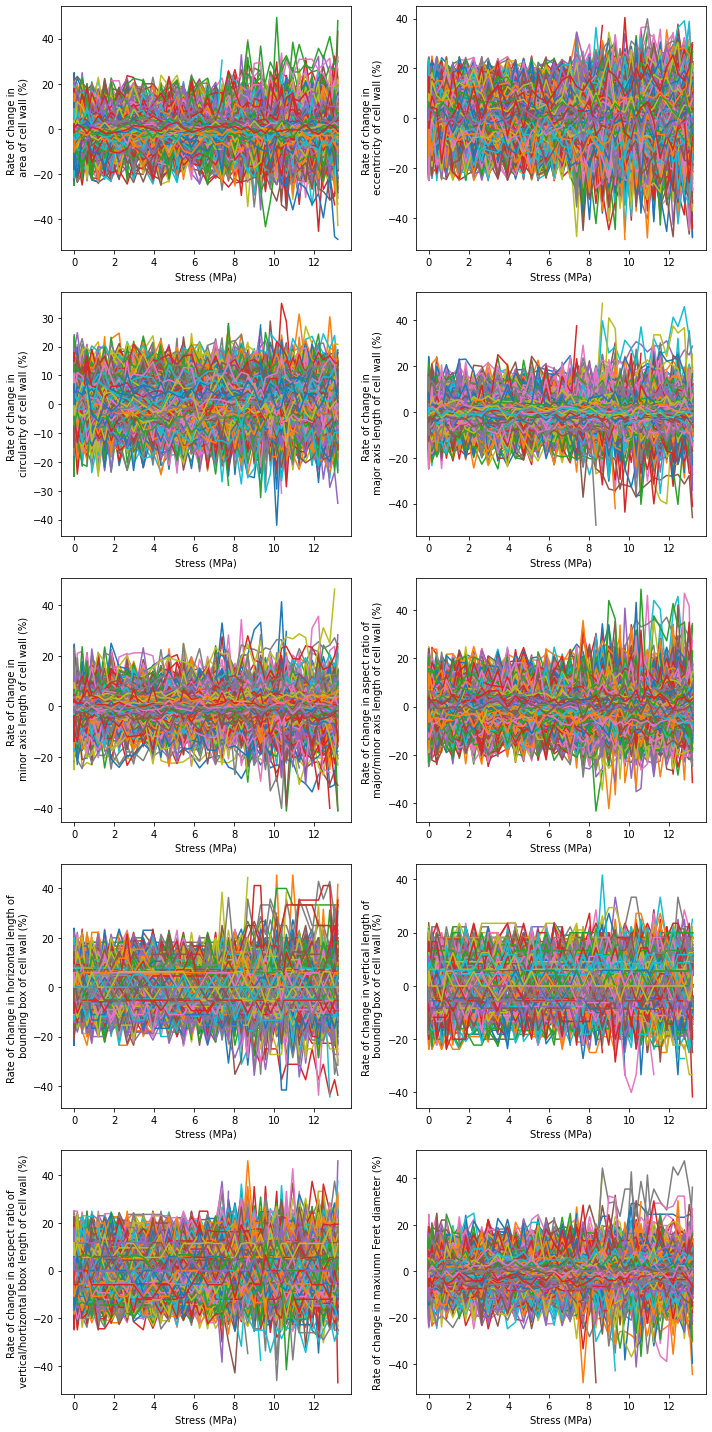

In [111]:
list_dict = {'particle_area_change_lists_mod'}
fig, ax = plt.subplots(5,2,figsize=(10,20))

for i in range(len(particle_area_change_rate_lists_mod)):
    ax[0,0].plot(stress_qh2[0:len(particle_area_change_rate_lists_mod[i])], particle_area_change_rate_lists_mod[i])
    ax[0,0].set_xlabel('Stress (MPa)')
    ax[0,0].set_ylabel('Rate of change in \n area of cell wall (%)')
    
for j in range(len(particle_ecc_change_rate_lists_mod)):
    ax[0,1].plot(stress_qh2[0:len(particle_ecc_change_rate_lists_mod[j])], particle_ecc_change_rate_lists_mod[j])
    ax[0,1].set_xlabel('Stress (MPa)')
    ax[0,1].set_ylabel('Rate of change in \n eccentricity of cell wall (%)')

for k in range(len(particle_cir_change_rate_lists_mod)):
    ax[1,0].plot(stress_qh2[0:len(particle_cir_change_rate_lists_mod[k])], particle_cir_change_rate_lists_mod[k])
    ax[1,0].set_xlabel('Stress (MPa)')
    ax[1,0].set_ylabel('Rate of change in \n circularity of cell wall (%)')

for k in range(len(particle_major_change_rate_lists_mod)):
    ax[1,1].plot(stress_qh2[0:len(particle_major_change_rate_lists_mod[k])], particle_major_change_rate_lists_mod[k])
    ax[1,1].set_xlabel('Stress (MPa)')
    ax[1,1].set_ylabel('Rate of change in \n major axis length of cell wall (%)')
    
for l in range(len(particle_minor_change_rate_lists_mod)):
    ax[2,0].plot(stress_qh2[0:len(particle_minor_change_rate_lists_mod[l])], particle_minor_change_rate_lists_mod[l])
    ax[2,0].set_xlabel('Stress (MPa)')
    ax[2,0].set_ylabel('Rate of change in \n minor axis length of cell wall (%)')

for l in range(len(particle_aspect_axis_change_rate_lists_mod)):
    ax[2,1].plot(stress_qh2[0:len(particle_aspect_axis_change_rate_lists_mod[l])], particle_aspect_axis_change_rate_lists_mod[l])
    ax[2,1].set_xlabel('Stress (MPa)')
    ax[2,1].set_ylabel('Rate of change in aspect ratio of \n major/minor axis length of cell wall (%)')

for m in range(len(particle_hori_change_rate_lists_mod)):
    ax[3,0].plot(stress_qh2[0:len(particle_hori_change_rate_lists_mod[m])], particle_hori_change_rate_lists_mod[m])
    ax[3,0].set_xlabel('Stress (MPa)')
    ax[3,0].set_ylabel('Rate of change in horizontal length of \n bounding box of cell wall (%)')
    
for n in range(len(particle_vert_change_rate_lists_mod)):
    ax[3,1].plot(stress_qh2[0:len(particle_vert_change_rate_lists_mod[n])], particle_vert_change_rate_lists_mod[n])
    ax[3,1].set_xlabel('Stress (MPa)')
    ax[3,1].set_ylabel('Rate of change in vertical length of \n bounding box of cell wall (%)')
    
for l in range(len(particle_aspect_bbox_change_rate_lists_mod)):
    ax[4,0].plot(stress_qh2[0:len(particle_aspect_bbox_change_rate_lists_mod[l])], particle_aspect_bbox_change_rate_lists_mod[l])
    ax[4,0].set_xlabel('Stress (MPa)')
    ax[4,0].set_ylabel('Rate of change in ascpect ratio of \n vertical/hortizontal bbox length of cell wall (%)')
    
for o in range(len(particle_feret_change_rate_lists_mod)):
    ax[4,1].plot(stress_qh2[0:len(particle_feret_change_rate_lists_mod[o])], particle_feret_change_rate_lists_mod[o])
    ax[4,1].set_xlabel('Stress (MPa)')
    ax[4,1].set_ylabel('Rate of change in maxiumn Feret diameter (%)')
    
fig.tight_layout()

In [112]:
dis_area_change_rate_array_mod = make_distribution(area_change_lists_array,thr_min=-50, thr_max=50)
dis_ecc_change_rate_array_mod = make_distribution(ecc_change_lists_array,thr_min=-50, thr_max=50)
dis_cir_change_rate_array_mod = make_distribution(cir_change_lists_array,thr_min=-50, thr_max=50)
dis_major_change_rate_array_mod = make_distribution(major_change_lists_array,thr_min=-50, thr_max=50)
dis_minor_change_rate_array_mod = make_distribution(minor_change_lists_array,thr_min=-50, thr_max=50)
dis_aspect_axis_change_array_lists_mod = make_distribution(aspect_axis_change_lists_array,thr_min=-50, thr_max=50)
dis_hori_change_rate_array_mod = make_distribution(hori_change_lists_array,thr_min=-50, thr_max=50)
dis_vert_change_rate_array_mod = make_distribution(vert_change_lists_array,thr_min=-50, thr_max=50)
dis_aspect_bbox_change_rate_array_mod = make_distribution(aspect_bbox_change_lists_array,thr_min=-50, thr_max=50)
dis_feret_change_rate_array_mod = make_distribution(feret_change_lists_array,thr_min=-50, thr_max=50)

/Users/chen/miniforge3/envs/dl-chen/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
100%|█████████████████████████████████████████| 45/45 [00:00<00:00, 8813.62it/s]


100%|█████████████████████████████████████████| 45/45 [00:00<00:00, 9423.99it/s]


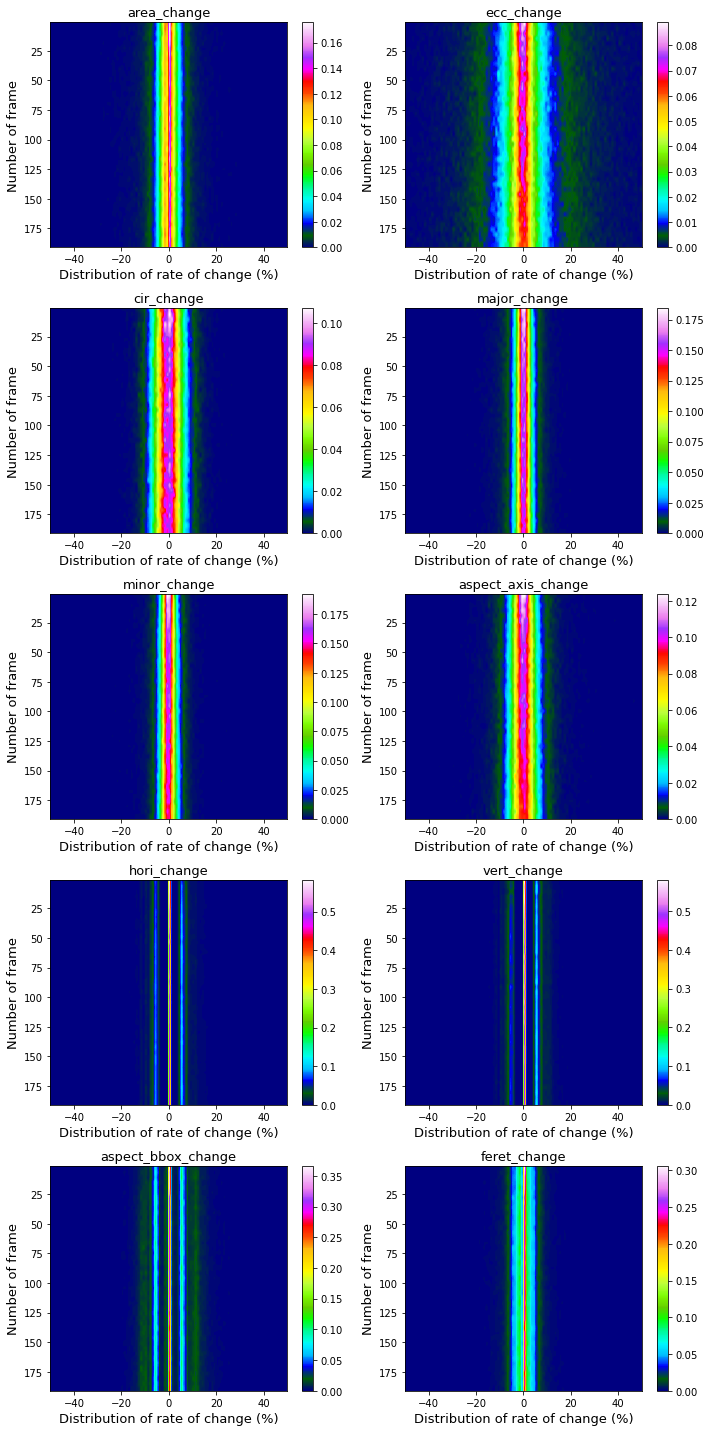

In [114]:
list_name = ['area_change', 'ecc_change', 'cir_change', 'major_change', 'minor_change', 'aspect_axis_change',
            'hori_change', 'vert_change', 'aspect_bbox_change', 'feret_change']

fig, ax = plt.subplots(5,2,figsize=(10,20))
for i, ax in zip(range(len(list_name)), ax.flat):
    change_lists_array = HF_list[list_name[i]]
    dis_change_list_array = make_distribution(change_lists_array,thr_min=-50, thr_max=50)
    
    im = ax.imshow(dis_change_list_array, cmap='gist_ncar', extent=(-50,50,191,1),aspect='0.5')
    ax.set_ylabel('Number of frame', fontsize=13)
    ax.set_xlabel('Distribution of rate of change (%)',fontsize=13)
    ax.set_title(list_name[i], fontsize=13)
    fig.colorbar(im, ax=ax)    
fig.tight_layout()